In [ ]:
# import the dataset into a data frame
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
url = 'https://drive.google.com/file/d/1mVM6jJNrm0Gk8pM7rOfGd8sRPenzn3A6/view?usp=share_link'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


Converteing start date and end date to operational months.

In [ ]:
def calculate_months(start, end):
  """
  Calculates the number of months between 2 dates

  Args:
    start: A datetime object representing the start date
    end: A datetime object representing the end date

  Returns:
    The number of months betwnee start and end
  """

  delta = start - end
  months = delta.days // 30
  return months

# Create a new column called 'operational_months'
df['founded_at'] = pd.to_datetime(df['founded_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])
df['operational_months'] = df.apply(lambda row: calculate_months(row['founded_at'], row['closed_at']), axis=1)

In [ ]:
# convert all NaN in operational_months to 0
df['operational_months'] = df['operational_months'].fillna(0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,operational_months
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,0,1,0,0,0,0,1.0000,0,acquired,0.0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,1,0,0,1,1,1,4.7500,1,acquired,0.0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,0,0,1,0,0,0,4.0000,1,acquired,0.0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,0,0,0,1,1,1,3.3333,1,acquired,0.0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,1,1,0,0,0,0,1.0000,1,closed,-27.0


Converting first funding date to last funding date to funding_months

In [ ]:
# create a new column for funding months
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'])
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'])
df['funding_months'] = df.apply(lambda row: calculate_months(row['first_funding_at'], row['last_funding_at']), axis=1)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,operational_months,funding_months
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,1,0,0,0,0,1.0000,0,acquired,0.0,-10
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,0,0,1,1,1,4.7500,1,acquired,0.0,-60
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,0,1,0,0,0,4.0000,1,acquired,0.0,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,0,0,1,1,1,3.3333,1,acquired,0.0,-27
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,1,0,0,0,0,1.0000,1,closed,-27.0,-21


In [ ]:
# drop unnessary columns for visualization
df = df.drop(['Unnamed: 0', 'id', 'Unnamed: 6', 'labels', 'object_id', 'zip_code', 'is_othercategory', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at'], axis=1)
df = df.fillna(0)
df.head()

,state_code,latitude,longitude,city,name,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,operational_months,funding_months
0,CA,42.358880,-71.056820,San Diego,Bandsintown,2.2493,3.0027,4.6685,6.7041,3,...,1,0,0,0,0,1.0000,0,acquired,0.0,-10
1,CA,37.238916,-121.973718,Los Gatos,TriCipher,5.1260,9.9973,7.0055,7.0055,9,...,0,0,1,1,1,4.7500,1,acquired,0.0,-60
2,CA,32.901049,-117.192656,San Diego,Plixi,1.0329,1.0329,1.4575,2.2055,5,...,0,1,0,0,0,4.0000,1,acquired,0.0,0
3,CA,37.320309,-122.050040,Cupertino,Solidcore Systems,3.1315,5.3151,6.0027,6.0027,5,...,0,0,1,1,1,3.3333,1,acquired,0.0,-27
4,CA,37.779281,-122.419236,San Francisco,Inhale Digital,0.0000,1.6685,0.0384,0.0384,2,...,1,0,0,0,0,1.0000,1,closed,-27.0,-21


In [ ]:
# create a visual map of the locations of starup companies
import folium
latitude_initial = 35.785548
longitude_initial = -78.67157
map = folium.Map(location = [latitude_initial, longitude_initial],
                  zoom_start = 4, tiles = 'cartodbpositron')
for index, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup = row['state_code']).add_to(map)
map

The next vizualisation helps show that the dataset there could be a useful consideration to do stratisfied sampling here, since the data has an unbalanced ratio of acquired versus closed startups, thus possibly creating a training bias to the model to give more aquired predictions than closed.

<ipython-input-73-317699983653>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['status'], palette = 'viridis')


<Axes: xlabel='status', ylabel='count'>

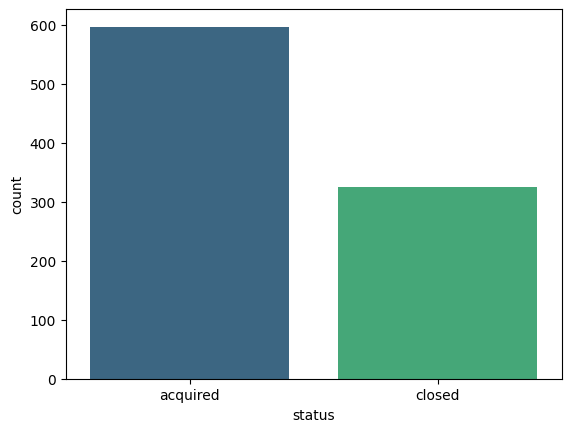

In [ ]:
# display the number of acquired and closed startups
import seaborn as sns
sns.countplot(x = df['status'], palette = 'viridis')

After visualization

In [ ]:
# drop all columns unnessary for training
hold_test = df['status']
df = df.drop(['status', 'latitude', 'longitude', 'name', 'city', 'state_code', 'category_code', 'is_top500', 'state_code.1'], axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Create a StandardScaler object
scaler = StandardScaler()

# 2. Fit the scaler to the data
scaler.fit(df)

df_temp = df

# 3. Transform the data
df = scaler.transform(df)

# 4. Print the normalized data
print(df)

[[ 0.00544819 -0.31310227  0.71840797 ... -0.98131975  0.57696987
   0.46249943]
 [ 1.15196028  2.04491818  1.5117343  ...  1.02019053  0.57696987
  -1.64704285]
 [-0.47934943 -0.97716151 -0.3716095  ...  0.61988848  0.57696987
   0.88440789]
 ...
 [ 2.4950378   1.53876602  2.19066141 ...  2.75483278 -2.99247118
   0.88440789]
 [-0.58855244 -0.37034527 -0.60875874 ... -0.98131975  0.57696987
  -0.2125541 ]
 [ 0.35266595 -0.27338952  0.49239314 ...  0.0861524   0.57696987
   0.88440789]]


In [ ]:
# random sampling with a 20% test size
X = df
y = hold_test
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 422)

In [ ]:
# train the model using Logistic Regression
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

# create the predictions of the testing data
pred_lr = lr.predict(xtest)
print(pred_lr)

['acquired' 'acquired' 'closed' 'acquired' 'closed' 'acquired' 'acquired'
 'acquired' 'acquired' 'acquired' 'closed' 'acquired' 'closed' 'closed'
 'acquired' 'acquired' 'closed' 'acquired' 'acquired' 'acquired'
 'acquired' 'acquired' 'closed' 'acquired' 'acquired' 'closed' 'acquired'
 'acquired' 'acquired' 'acquired' 'acquired' 'closed' 'acquired'
 'acquired' 'acquired' 'acquired' 'acquired' 'closed' 'acquired' 'closed'
 'acquired' 'acquired' 'acquired' 'acquired' 'acquired' 'closed'
 'acquired' 'acquired' 'acquired' 'acquired' 'closed' 'acquired'
 'acquired' 'acquired' 'closed' 'acquired' 'acquired' 'acquired' 'closed'
 'acquired' 'acquired' 'acquired' 'closed' 'closed' 'closed' 'acquired'
 'acquired' 'acquired' 'acquired' 'acquired' 'acquired' 'acquired'
 'acquired' 'acquired' 'acquired' 'acquired' 'closed' 'closed' 'closed'
 'acquired' 'closed' 'acquired' 'closed' 'acquired' 'acquired' 'acquired'
 'closed' 'acquired' 'acquired' 'acquired' 'acquired' 'acquired'
 'acquired' 'acquired'

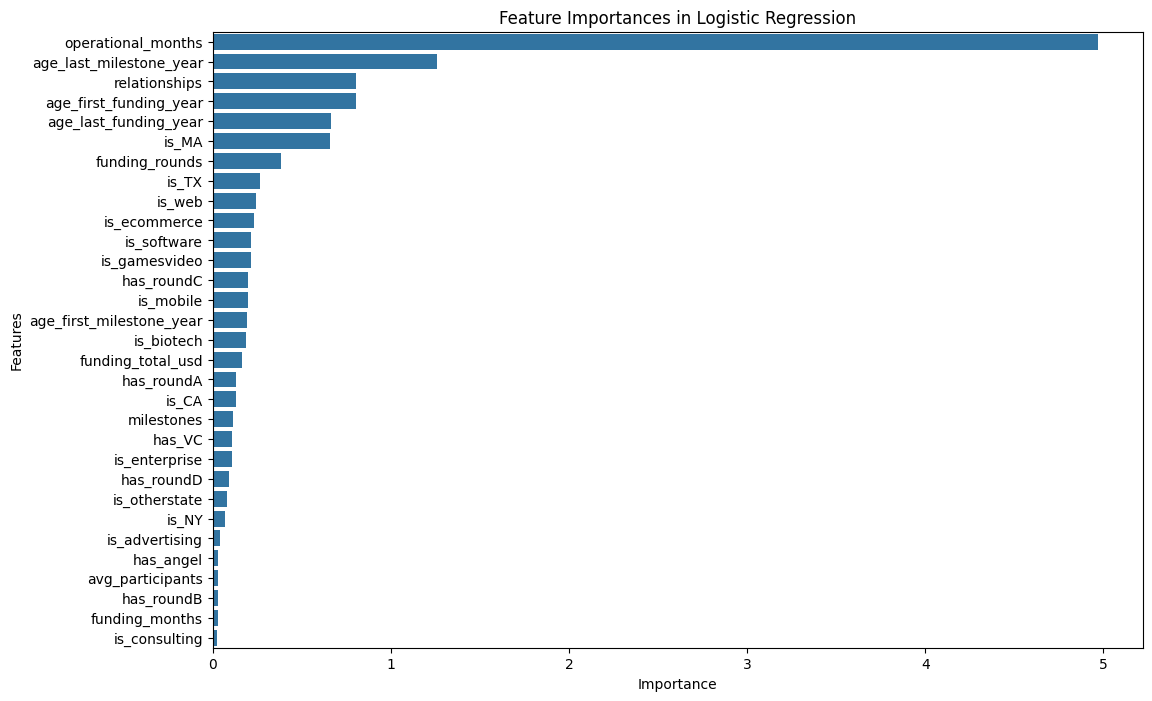

In [ ]:
# plotting feature selection of the normalized data

# Assuming the model 'lr' and data 'df' are already defined
feature_importance = abs(lr.coef_[0])
features = df_temp.columns

# Creating a DataFrame for easier plotting
importance_df = pd.DataFrame({'Features': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12,8))
sns.barplot(data=importance_df, x='Importance', y='Features')
plt.title('Feature Importances in Logistic Regression')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [ ]:
# perform cross-validation and get accuracy, recall, and precision results
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming 'X' and 'y' are already defined and are your features and target variable respectively

# Create a logistic regression model within a pipeline that includes scaling
model = make_pipeline(StandardScaler(), LogisticRegression())

# Setup the cross-validation strategy
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Predict using cross-validation
y_pred = cross_val_predict(model, X, y, cv=cv)

# Scores
accuracy = accuracy_score(y, y_pred)
recall = recall_score(y, y_pred, average='weighted')  # You can change to 'binary' if you have binary classification
precision = precision_score(y, y_pred, average='weighted')  # Same note as recall

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

# Detailed classification report
print(classification_report(y, y_pred))


Accuracy: 0.9739978331527628
Recall: 0.9739978331527628
Precision: 0.9739978331527628
              precision    recall  f1-score   support

    acquired       0.98      0.98      0.98       597
      closed       0.96      0.96      0.96       326

    accuracy                           0.97       923
   macro avg       0.97      0.97      0.97       923
weighted avg       0.97      0.97      0.97       923

